In [15]:
# Import libraries
import math
import pandas as pd
import numpy as np

# Modeling Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

# Loading the dataset
df = pd.read_csv('BreastCancer_NewClass.csv', delimiter=';')

# Data Preprocessing
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})
df = df.sample(frac=1, random_state=42)

# params for every model
 
params = {
    "RandomForestClassifier": {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'criterion': ['gini', 'entropy']},
    "GradientBoostingClassifier": {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200], 'max_depth': [3, 5, 10]},
    "LogisticRegression": {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
    "MLPClassifier": {'activation': ['tanh', 'relu'], 'hidden_layer_sizes': [(50,50), (100,)], 'max_iter': [1000]}
}

models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier()
}

# For each rate r of data poisoning

for r in [0.05, 0.25, 0.5, 0.75]:
    df_mod = df.copy()
    
# Calculating the number of labels to flip

    diagnosis_poison = math.ceil(len(df_mod[df_mod['diagnosis'] == 0]) * r)
    
# Selecting Outcomepoison observations to poison

    poison_indices = df_mod.sample(n=diagnosis_poison, random_state=42).index

# Flipping the labels of the selected observations

    df_mod.loc[poison_indices, 'diagnosis'] = 1 - df_mod.loc[poison_indices, 'diagnosis']
    df_mod.loc[poison_indices, 'attack'] = 1 - df_mod.loc[poison_indices, 'attack']
    
# Save the poisoned dataset 
    df.to_csv(f'BC_Poisoning_Detecton_{int(r*100)}.csv', index=False)
    
# Splitting the dataset into training and testing sets

    X = df_mod.drop(['attack'], axis=1)
    y = df_mod['attack']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)
    
# SMOTE applide for class balance 

    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    print(f"\nMetrics for poisoning rate {r}:")
    for model_name, model in models.items():
        
# Training the model using GridSearchCV to find the best parameters

        clf = GridSearchCV(model, params[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        clf.fit(X_train_res, y_train_res)
        best_model = clf.best_estimator_
        y_pred = best_model.predict(X_test)

# Print the performance and best parameters for each model

        print(f"\nModel: {model_name}")
        print("Best Parameters:", clf.best_params_)  
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall:", recall_score(y_test, y_pred))
        print("F1-score:", f1_score(y_test, y_pred))
        
# Printting the confusion matrix for each model

        conf_matrix = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:\n", conf_matrix)



Metrics for poisoning rate 0.05:

Model: RandomForestClassifier
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}
Accuracy: 0.9239766081871345
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
 [[158   8]
 [  5   0]]

Model: GradientBoostingClassifier
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy: 0.9473684210526315
Precision: 0.25
Recall: 0.4
F1-score: 0.3076923076923077
Confusion Matrix:
 [[160   6]
 [  3   2]]

Model: LogisticRegression
Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.9707602339181286
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
 [[166   0]
 [  5   0]]

Model: MLPClassifier
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'max_iter': 1000}
Accuracy: 0.9707602339181286
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
 [[166   0]
 [  5   0]]

Metrics for poisoning rate 0.25:

Model: RandomForestClassifier
Best Parameters: {'criterion': '

In [1]:
#SVM model

#poisoning rates(5,25,50,75) 
import math
import pandas as pd
import numpy as np
import warnings

# Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore") 

# Loading the dataset
df = pd.read_csv('BreastCancer_NewClass.csv', delimiter=';')

# Data Preprocessing
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})
df = df.sample(frac=1, random_state=42)

# params for model
classifiers = {
    
    "SVC": SVC(gamma= 0.0001, kernel='rbf', C=10),
}

# For each rate r of data poisoning
for r in [0.05, 0.25, 0.5, 0.75]:
    df_copy = df.copy()

# Calculating the number of labels to flip

    diagnosis_poison = math.ceil(len(df_copy[df_copy['diagnosis'] == 0]) * r)
    
# Selecting Outcomepoison observations to poison

    poison_indices = df_copy.sample(n=diagnosis_poison, random_state=42).index
    
# Flipping the labels of the selected observations

    df_copy.loc[poison_indices, 'diagnosis'] = 1 - df_copy.loc[poison_indices, 'diagnosis']
    df_copy.loc[poison_indices, 'attack'] = 1 - df_copy.loc[poison_indices, 'attack']
    
     # Save the poisoned dataset 
    df.to_csv(f'BC_Poisoning_Detecton_{int(r*100)}.csv', index=False)
    
    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(df_copy.drop(['attack'], axis=1), df_copy['attack'], test_size=0.3, random_state=101, stratify=df_copy['attack'])
    
    # SMOTE applide for class balance 
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    
    print(f"\nMetrics for poisoning rate {r}:")
    
    # Train the model and print the results
    for name, classifier in classifiers.items():
        classifier.fit(X_train_res, y_train_res)
        y_pred = classifier.predict(X_test)
        
    # Print the metrics results
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        print(f"\nModel: {name}")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)
        print("Confusion Matrix:\n", conf_matrix)


Metrics for poisoning rate 0.05:

Model: SVC
Accuracy: 0.8538011695906432
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
 [[146  20]
 [  5   0]]

Metrics for poisoning rate 0.25:

Model: SVC
Accuracy: 0.7894736842105263
Precision: 0.09090909090909091
Recall: 0.037037037037037035
F1-score: 0.05263157894736842
Confusion Matrix:
 [[134  10]
 [ 26   1]]

Metrics for poisoning rate 0.5:

Model: SVC
Accuracy: 0.6491228070175439
Precision: 0.3125
Recall: 0.09259259259259259
F1-score: 0.14285714285714285
Confusion Matrix:
 [[106  11]
 [ 49   5]]

Metrics for poisoning rate 0.75:

Model: SVC
Accuracy: 0.5087719298245614
Precision: 0.43478260869565216
Recall: 0.12345679012345678
F1-score: 0.1923076923076923
Confusion Matrix:
 [[77 13]
 [71 10]]


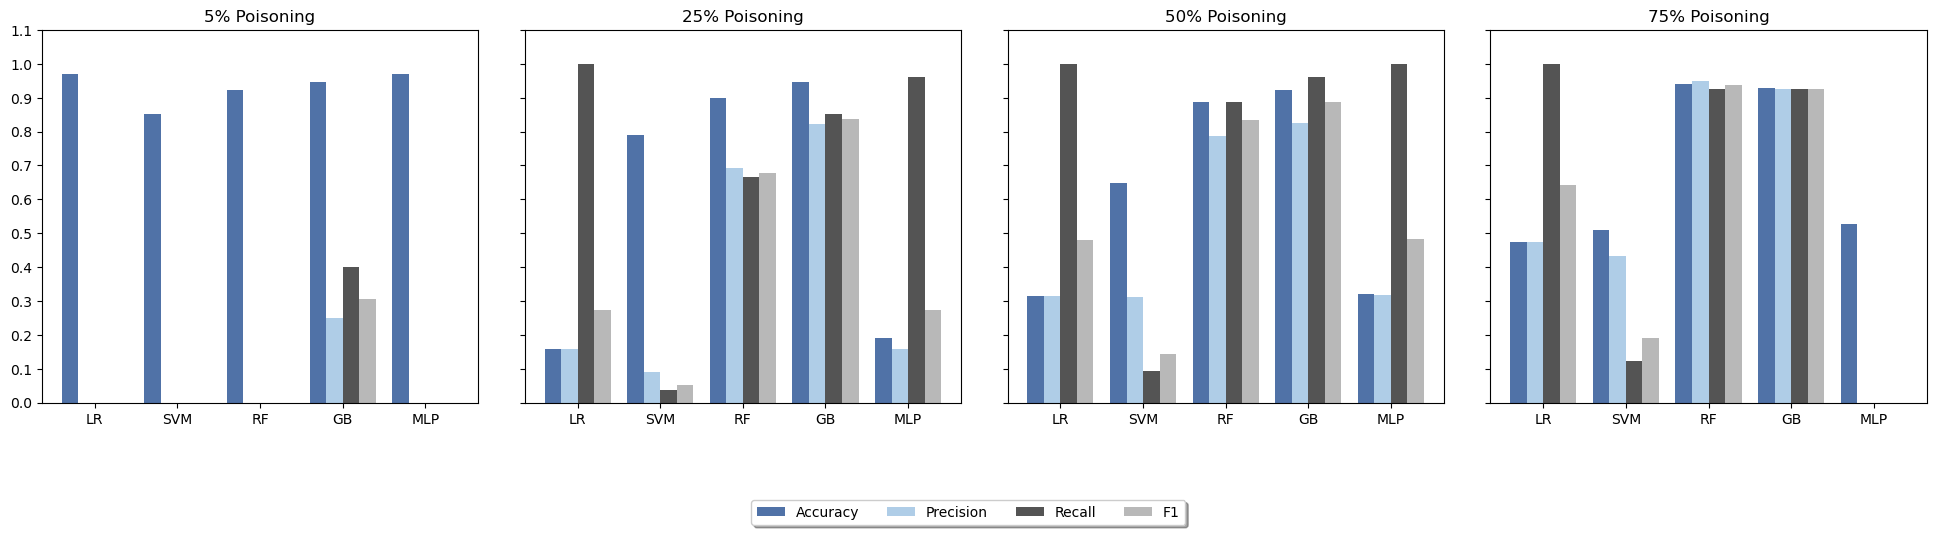

In [3]:
#اعتماد..histogram بااخر نتائج

import matplotlib.pyplot as plt
import numpy as np

data = {
    '5%': {
        'Accuracy': [0.970, 0.853, 0.923, 0.947, 0.970],
        'Precision': [0, 0, 0, 0.25, 0],
        'Recall': [0, 0, 0, 0.4, 0],
        'F1': [0, 0, 0, 0.307, 0]
    },
    '25%': {
        'Accuracy': [0.157, 0.789, 0.900, 0.947, 0.192],
        'Precision': [0.157,0.090, 0.692, 0.821, 0.159],
        'Recall': [1.0, 0.037, 0.666, 0.851, 0.962],
        'F1': [0.272, 0.052, 0.679, 0.836, 0.273]
    },
    '50%': {
        'Accuracy': [0.315, 0.649, 0.888, 0.923, 0.321],
        'Precision': [0.315, 0.312, 0.786, 0.825, 0.317],
        'Recall': [1.0, 0.092, 0.888, 0.962, 1.0],
        'F1': [0.479, 0.142, 0.834, 0.888, 0.482]
    },
    '75%': {
        'Accuracy': [0.473, 0.508, 0.941, 0.929, 0.526],
        'Precision': [0.473, 0.434, 0.949, 0.925, 0],
        'Recall': [1.0, 0.123, 0.925, 0.925, 0],
        'F1': [0.642,  0.192, 0.937, 0.925, 0]
    }
}

# Colors for the bars
colors = ['#5072A7', '#AFCDE7', '#545454', '#B8B8B8']
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1']

# Create the histogram plot
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
axs = axs.flatten()

# Plotting data for each poisoning level
for idx, (key, value) in enumerate(data.items()):
    ax = axs[idx]
    for i, metric in enumerate(metric_labels):
        ax.bar(np.arange(len(value[metric])) + (i*0.2), value[metric], 0.2, color=colors[i], label=metric)

# Add common Y-axis labels and ticks
for ax in axs:
    ax.set_yticks(np.arange(0, 1.3, 0.1))
    ax.set_ylim(0, 1.1)

# Set model names as x-axis labels
model_names = ['LR', 'SVM', 'RF', 'GB', 'MLP']
for ax in axs:
    ax.set_xticks(np.arange(len(model_names)) + 0.3)
    ax.set_xticklabels(model_names)

# Set the title for each subplot
for ax, poisoning in zip(axs, ['5% Poisoning', '25% Poisoning', '50% Poisoning', '75% Poisoning']):
    ax.set_title(poisoning)

# Add the legend below the subplots
fig.legend(metric_labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4)

# Adjust the layout
plt.tight_layout(pad=3.0)

# Save the histogram with legends properly placed
output_file = 'breast_cancer_detection_histogram.png'
plt.savefig(output_file, bbox_inches='tight')

plt.show()  # This line will display the histogram in the output cell


In [ ]:
نعم، في الكود الذي قدمته، تم تطبيق تقنية `SMOTE` على بيانات التدريب فقط، وهذا هو النهج الصحيح لاستخدامها.
باستخدام `SMOTE.fit_resample(X_train, y_train)`, 
يتم توليد نقاط بيانات اصطناعية لموازنة الفئات في مجموعة التدريب فقط، دون التأثير على مجموعة الاختبار

تقسيم البيانات إلى مجموعات تدريب واختبار قبل تطبيق `SMOTE` يضمن أن تقييم أداء النموذج يكون دقيقاً وواقعياً، لأن مجموعة الاختبار تبقى غير متأثرة بالبيانات الاصطناعية التي تم توليدها.
هذا يمنع المبالغة في تقدير أداء النموذج عند تقييمه على بيانات لم يراها من قبل.

بعد تطبيق `SMOTE`، تستخدم مجموعة البيانات المتوازنة الجديدة `X_train_res, y_train_res` 
لتدريب النماذج باستخدام `GridSearchCV` لإيجاد أفضل المعلمات. هذا يحسن قدرة النماذج على التعلم من البيانات المتوازنة والتنبؤ بشكل أكثر دقة بالفئات الأقل تمثيلاً.

أخيراً، يتم استخدام النماذج المدربة للتنبؤ بالبيانات في مجموعة الاختبار `X_test` وتقييم أدائها من خلال مقاييس مثل الدقة
(Accuracy)، الدقة الخاصة (Precision)، الاستدعاء (Recall)، ومعدل F1 (F1-score)، إلى جانب عرض مصفوفة الالتباس. هذه الخطوات تضمن أن النماذج تُقيّم بناءً على قدرتها على التنبؤ بالبيانات الحقيقية والتعامل مع عدم التوازن في البيانات بشكل فعال.